# 2018/2019 - Task List 1

1. Generate random variable from prefered dystribution using Pyro (pyro.sample)
    
    - animate how distribution of values changes
    - animate histograms of values
    - start with empty list of values, generate new samples, generate histogram
    
    
2. Write a simulator (and exact solution utilizing Bayes theorem) for chances to be ill on a certain disease. We know that it affects from about 1 to 100 out of 50,000 people. There was developed a test to check whether the person has the disease and it is quite accurate: the probability that the test result is positive (suggesting the person has the disease), given that the person does not have the disease, is only 2 percent; the probability that the test result is negative (suggesting the person does not have the disease), given that the person has the disease, is only 1 percent. When a random person gets tested for the disease and the result comes back positive, what is the probability that the person has the disease? Check whole parameter space and visualise results.

    - it must be a simulator!
    - sample from distribution using given probabilities
    - repeate experiment and compare with Bayes equation


## Required imports

In [6]:
%matplotlib inline
import pyro
import torch
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

## Generating single value from normal distribution with given mean and variance

In [30]:
mean = 0
variance = 1
x = pyro.sample("normal_sampling", pyro.distributions.Normal(mean, variance))
print(x)

tensor(-0.1314)


## Sampling from categorical probabilities with given probabilities

In [31]:
x = pyro.sample("categorical_sampling", pyro.distributions.Categorical(torch.tensor([0.5, 0.5])))
print(x)

tensor(0)


## Animating data

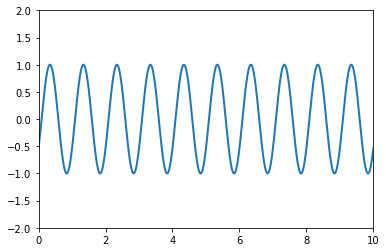

In [32]:
def animate():
    # First set up the figure, the axis, and the plot element we want to animate
    fig, ax = plt.subplots()

    ax.set_xlim(( 0, 10))
    ax.set_ylim((-2, 2))

    line, = ax.plot([], [], lw=2)
    
    # animation function. This is called sequentially
    def sin(i):
        x = np.linspace(0, 10, 1000)
        y = np.sin(2 * np.pi * (x - 0.01 * i))
        line.set_data(x, y)
        return (line,)

    # initialization function: plot the background of each frame
    def init():
        line.set_data([], [])
        return (line,)
    # call the animator. blit=True means only re-draw the parts that have changed.
    anim = animation.FuncAnimation(fig, sin, init_func=init,
                                   frames=10, interval=20, blit=True)
    return HTML(anim.to_jshtml())

animate()

## Drawing histogram

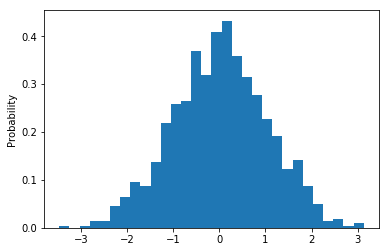

In [743]:
x = np.random.normal(size = 1000)
plt.hist(x, density=True, bins=30)
plt.ylabel('Probability');

## Task 1

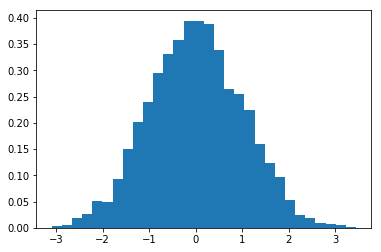

In [40]:
%matplotlib inline
import pyro
import torch
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

def animate():
    # First set up the figure, the axis, and the plot element we want to animate
    fig, ax = plt.subplots()

    y=[]
    mean = 0
    variance = 1
    
    # animation function. This is called sequentially
    def myFunc(i):
        ax.clear()
        for i in range(30):
            y.append(pyro.sample("normal_sampling", pyro.distributions.Normal(mean, variance)))
        plt.hist(y, density=True, bins=30)

    anim = animation.FuncAnimation(fig, myFunc, frames=150, interval=20, blit=False)
    return HTML(anim.to_jshtml())

animate()

## Task 2

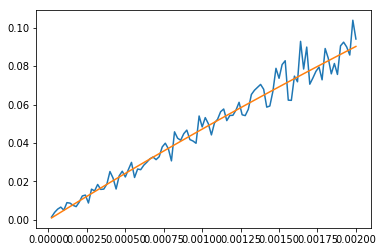

In [8]:
import pyro
import torch
import numpy as np

numberOfPeople = 100000

sickProbability = []
simulationY = []
bayesY = []

for i in range(1, 101):
    positive = 0
    sickWithPositiveResult = 0
    for j in range(1, numberOfPeople + 1):
        sick = pyro.sample("categorical_sampling", pyro.distributions.Categorical(torch.tensor([i/50000, 1-i/50000])))
        # 0 - sick
        if(sick.item() == 0):
            # 0 - negative, 1 - positive
            testResult = pyro.sample("categorical_sampling", pyro.distributions.Categorical(torch.tensor([0.01, 0.99])))
            if(testResult.item() == 1):
                positive += 1
                sickWithPositiveResult += 1
        else:
            # 0 - negative, 1 - positive
            testResult = pyro.sample("categorical_sampling", pyro.distributions.Categorical(torch.tensor([0.98, 0.02])))
            if(testResult.item() == 1):
                positive += 1
    
    if(positive != 0):
        #print(f'simulation result:{sickWithPositiveResult/positive}')
        simulationY.append(sickWithPositiveResult/positive)
        
    sickProbability.append(i/50000)
        
    bayes = (0.99 * (i/50000)) / (0.99 * (i/50000) + 0.02 * (1-(i/50000)))
    bayesY.append(bayes)
    #print(f'bayes result: {bayes}')
    
plt.plot(sickProbability, simulationY)
plt.plot(sickProbability, bayesY)

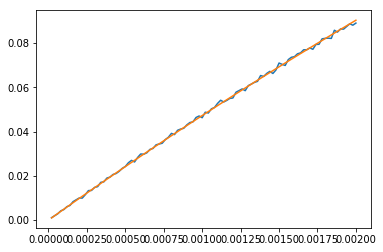

In [59]:
import random

sickProbability = []
simulationY = []
bayesY = []

numberOfPeople = 5000000

for i in range(1, 101):
    positive = 0
    sickWithPositiveResult = 0
    for j in range(1, numberOfPeople + 1):
        sick = random.random() < i/50000
        # 0 - sick
        if(sick):
            testResult = random.random() > 0.01
            if(testResult):
                positive += 1
                sickWithPositiveResult += 1
        else:
            testResult = random.random() > 0.98
            if(testResult):
                positive += 1
    
    if(positive != 0):
        a = sickWithPositiveResult/positive
        simulationY.append(a)
#         print(a)
    
    sickProbability.append(i/50000)
    
    bayes = (0.99 * (i/50000)) / (0.99 * (i/50000) + 0.02 * (1-(i/50000)))
    bayesY.append(bayes)
#     print(bayes)
    
plt.plot(sickProbability, simulationY)
plt.plot(sickProbability, bayesY)